# REINFORCE

Also knwon as  `Monte Carlo Policy Gradient`, a **policy-gradient learning algorithm** with the following update rule:

$$
\theta_{t+1} = \theta_t + \alpha G_t \frac{\nabla_{\theta}\pi(A_t \given S_t, \theta_t)}{\pi(A_t \given S_t, \theta_t)}
$$

Note that each increment is proportional to the product of a return $G_t$ and a vector; the gradient of the probability
of taking the action taken divided by the probability of taking that action. The vector is the
direction in parameter space that most increases the probability of repeating the action $A_t$ on future
visits to state $S_t$. The update increases the parameter vector in this direction proportional to the
return, and inversely proportional to the action probability. The former makes sense because it causes
the parameter to move most in the directions that favor actions that yield the highest return. The latter
makes sense because otherwise actions that are selected frequently are at an advantage.

> Note that `REINFORCE` uses the complete return from time $t$, which includes all future rewards up until the end of the episode.

## Parameters

In [ ]:
# TBD

## Environment

We implement the `short corridor with switched actions` as described in [Sutton and Barto's RL introduction book](http://incompleteideas.net/book/bookdraft2018jan1.pdf), 
Example 13.1, page 266.

<img src=attachment:3b015ad6-e586-493b-ad2e-61860141d750.png style="width:650px;"/>
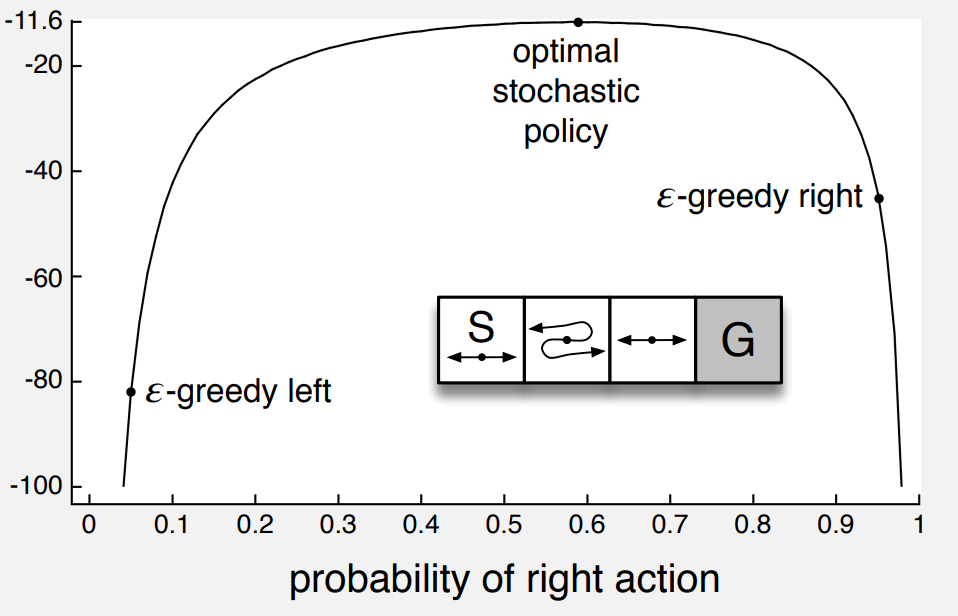

In [55]:
import sys


def println(text: str):
    sys.stdout.write("\r" + text)


class CorridorMDP:

    LEFT = 0
    RIGHT = 1

    def __init__(self, n_states: int = 4):
        self.n_states = n_states
        self.goal_state = self.n_states - 1
        self.state = None

    def check_initialized(self):
        if self.state is None:
            raise ValueError(f"Environment not initialized. perhaps run reset()?")

    @property
    def is_terminated(self) -> bool:
        return self.state == self.goal_state

    def reset(self):
        self.state = 0  # left-most state
        return self.state, {}  # state, info

    def step(self, action: int):
        self.check_initialized()

        if action not in [self.LEFT, self.RIGHT]:
            raise ValueError(
                f"Invalid action {action}. Must be one of: {self.LEFT} or {self.RIGHT}"
            )
        if self.is_terminated:
            raise ValueError(f"Episode is terminated. perhaps run reset()?")

        if action == self.LEFT:
            self.state += 1 if self.state == 1 else -1
        elif action == self.RIGHT:
            self.state += -1 if self.state == 1 else 1

        if self.is_terminated:
            # next_state, reward, terminated, truncated, info
            return self.state, 1, True, False, {}

        # clip in acceptable ranges
        self.state = max(0, min(self.n_states - 1, self.state))

        # next_state, reward, terminated, truncated, info
        return self.state, -1, False, False, {}

    def render(self, flush: bool = True):
        self.check_initialized()
        grid = [" s"] + [" ·" for _ in range(self.n_states - 2)] + ["⭐️"]
        grid[self.state] = "🕺🏻"
        grid = " | ".join(grid)
        if flush:
            println(grid)
        else:
            print(grid)

### Random walk

In [79]:
import random
import time

env = CorridorMDP(n_states=4)
env.reset()
env.render(flush=False)

for i in range(50):
    a = random.choice([0, 1])
    s, r, terminated, _, _ = env.step(a)
    env.render(flush=False)

    if terminated:
        break

🕺🏻 |  · |  · | ⭐️
 s | 🕺🏻 |  · | ⭐️
 s |  · | 🕺🏻 | ⭐️
 s |  · |  · | 🕺🏻
Breaking
